#### Import required librabries

In [59]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [60]:
stop_words = stopwords.words('english')

#### Data collection

In [4]:
data = pd.read_csv('../data/train.csv')

In [5]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
data.shape

(159571, 8)

#### Check for duplicates and null values

In [10]:
data.duplicated().sum()

0

In [11]:
data.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

#### Comprehensive info

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [14]:
target = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

#### Descriptive statistics

In [6]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Check target columns value counts

In [29]:
total = len(data)

for col in target:
    counts = data[col].value_counts()
    print(counts)
    print(f"{counts.index[0]}:", counts[0]/total*100)
    print(f"{counts.index[1]}:", counts[1]/total*100)
    print('-'*25)

0    144277
1     15294
Name: toxic, dtype: int64
0: 90.41555169799024
1: 9.584448302009765
-------------------------
0    157976
1      1595
Name: severe_toxic, dtype: int64
0: 99.00044494300343
1: 0.9995550569965721
-------------------------
0    151122
1      8449
Name: obscene, dtype: int64
0: 94.7051782592075
1: 5.2948217407925
-------------------------
0    159093
1       478
Name: threat, dtype: int64
0: 99.70044682304429
1: 0.2995531769557125
-------------------------
0    151694
1      7877
Name: insult, dtype: int64
0: 95.06363938309592
1: 4.936360616904074
-------------------------
0    158166
1      1405
Name: identity_hate, dtype: int64
0: 99.11951419744189
1: 0.8804858025581089
-------------------------


#### Visualize the imbalance

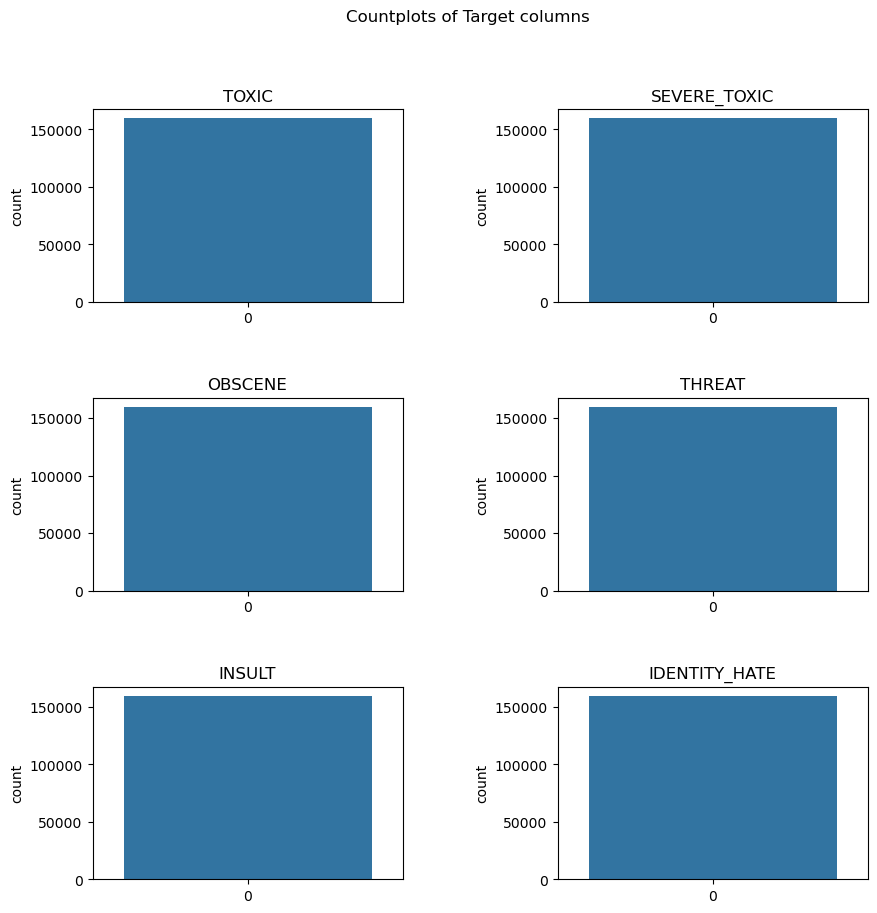

In [70]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
axes = axes.flatten()
plt.suptitle('Countplots of Target columns')

for i,col in enumerate(target):
    ax = axes[i]
    sns.countplot(data[col], ax=ax)
    ax.set_title(col.upper())

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Observation:
- Data is highly imbalanced for all target columns

#### Identify length of each text

In [34]:
data['text_length'] = data['comment_text'].apply(len)

In [41]:
data['text_length'].describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: text_length, dtype: float64

#### Check distribution of text length

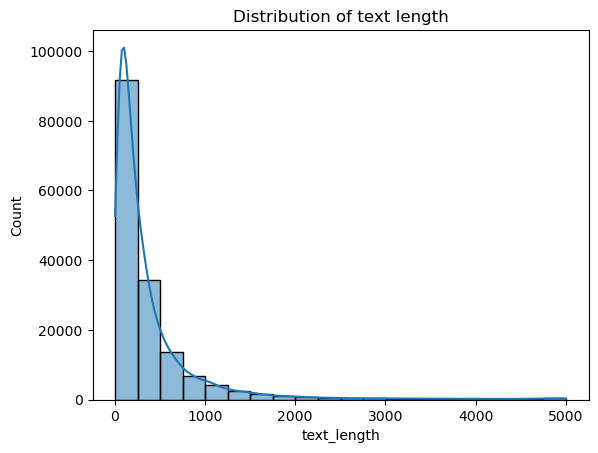

In [37]:
plt.title('Distribution of text length')
sns.histplot(data['text_length'], bins=20, kde=True)
plt.show()

#### Observation:
- Text length ranges between 6 and 5000 characters
- Average length of text is 205
- Most of the text;s length range between 0 and 250 characters
- Distribution of text length is right skewed

#### Toxicity vs text length

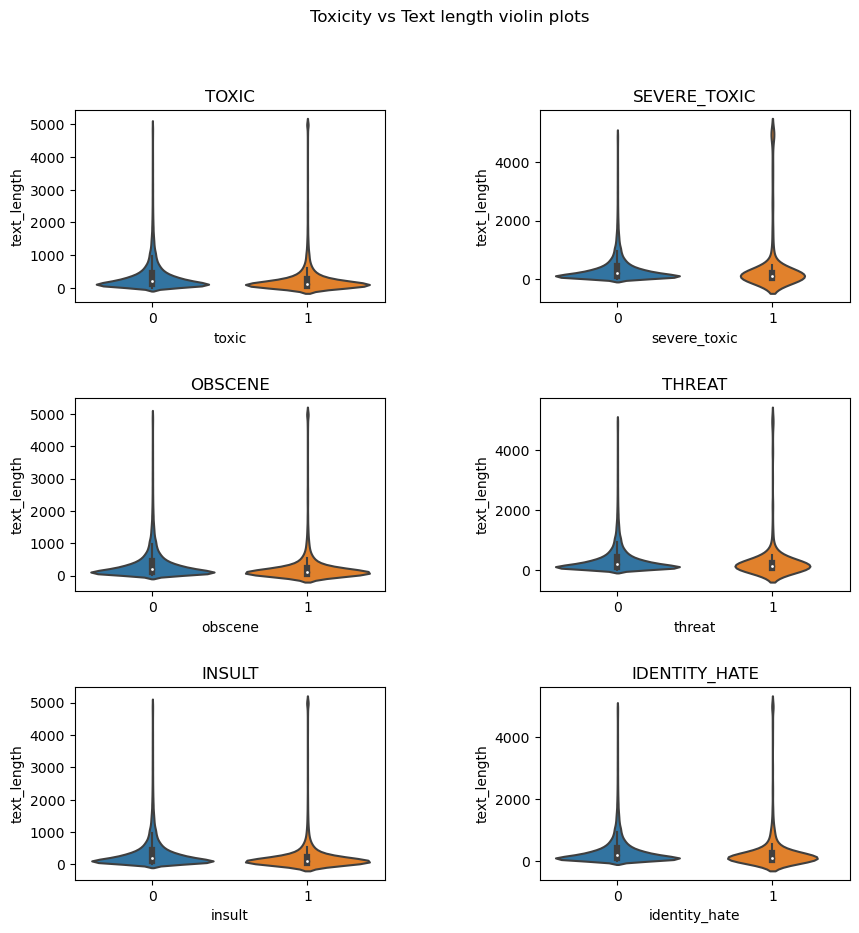

In [68]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
axes = axes.flatten()
plt.suptitle('Toxicity vs Text length violin plots')

for i,col in enumerate(target):
    ax = axes[i]
    sns.violinplot(x=col, y='text_length', data=data, ax=ax)
    ax.set_title(col.upper())

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Observation:
- There is no significant difference in text length of toxic and non toxic texts
- there are outliers present in the text length in all cases

#### Check correlation between features

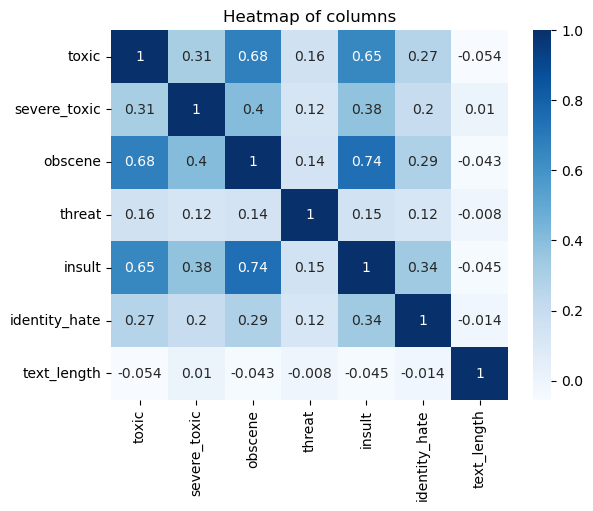

In [48]:
plt.title('Heatmap of columns')
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

#### Observation:
- There is good positive correlation between toxic and obscene columns
- There is good positive correlation between toxic and insult columns
- There is high positive correlation between insult and obscene columns
- Text length has almost no correlation with any target columns

#### Wordcloud for each target category

In [61]:
def plot_wordcloud(data, title):
    text = " ".join(data)
    wordcloud = WordCloud(width=800, height=400,
                          background_color='black',
                          max_words=2000,
                          stopwords=stop_words).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

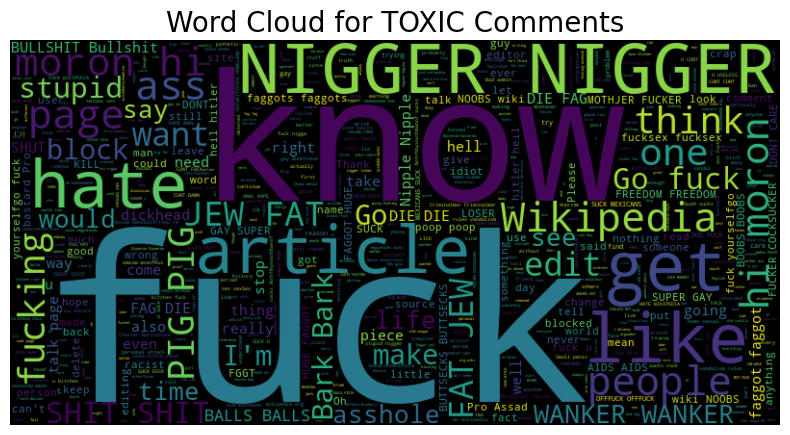

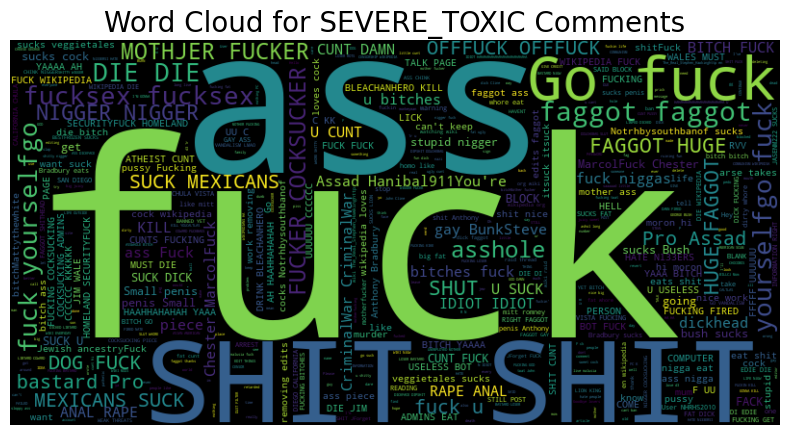

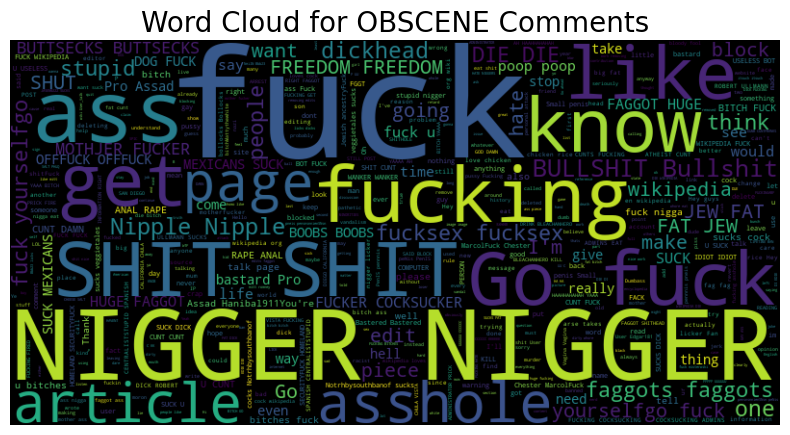

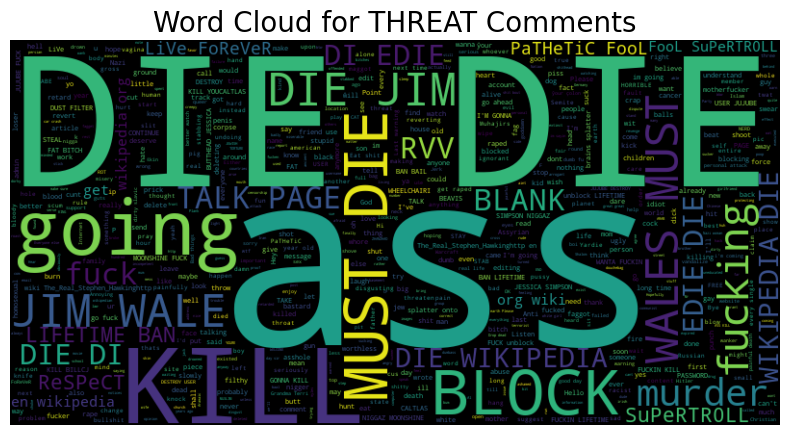

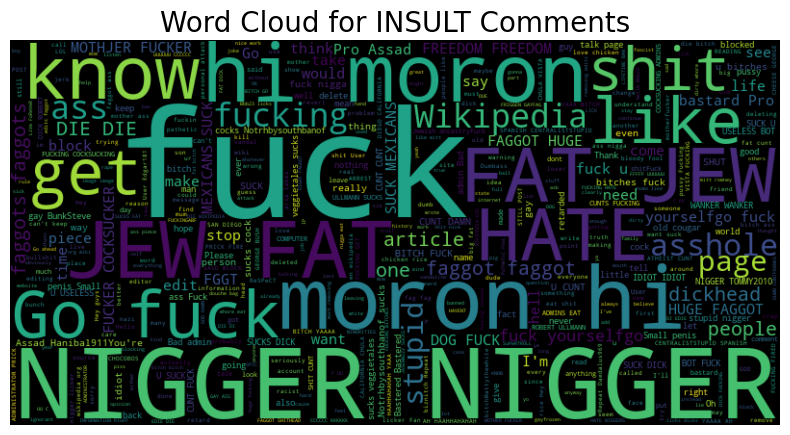

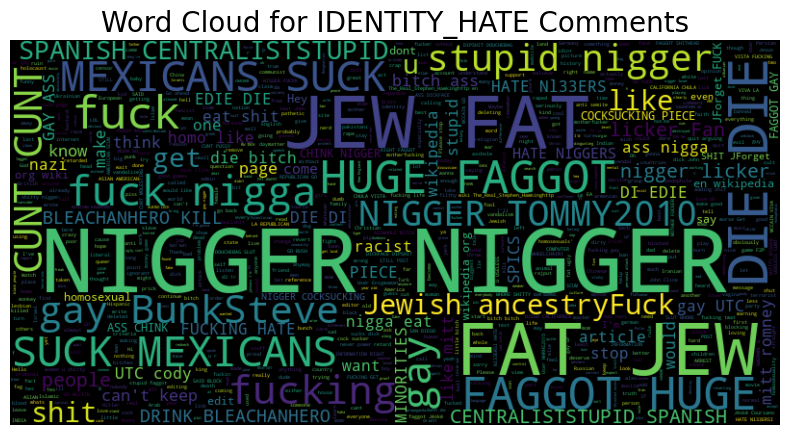

In [62]:
for col in target:
    subset = data[data[col] == 1]
    plot_wordcloud(subset['comment_text'], f'Word Cloud for {col.upper()} Comments')